# Lab 1

To understand and apply spatial transformations using convolution and correlation
methods with different kernels and analyze their effects on image features.

1. Image Preprocessing:
○ Select a grayscale image (e.g., 512x512 pixels) and normalize the pixel
values to the range [0, 1].

2. Apply Convolution:
○ Use the kernels Edge Detection (Sobel Filter in X direction) and
Sharpening Filter and give your interpretation by observing the
transformations.
3. Apply Correlation:
○ Apply correlation on the grayscale image and convolution images.
4. Edge Detection and Enhancement:
○ Apply Gaussian blur to the original image and edge detection convolution
image to create an enhanced edge-detected image.

5. Comparison and Analysis:
○ Interpret the results of correlation.
○ Interpret the effect of combining edge detection with Gaussian blur.

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

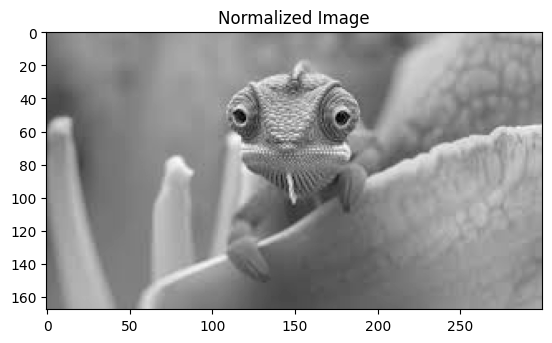

In [19]:
# Load the grayscale image
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Computer Vision/image.jpg', cv2.IMREAD_GRAYSCALE)

# Normalize the image to range [0, 1]
normalized_image = image / 255

# Display the normalized image
plt.imshow(normalized_image, cmap='gray')
plt.title('Normalized Image')
plt.show()

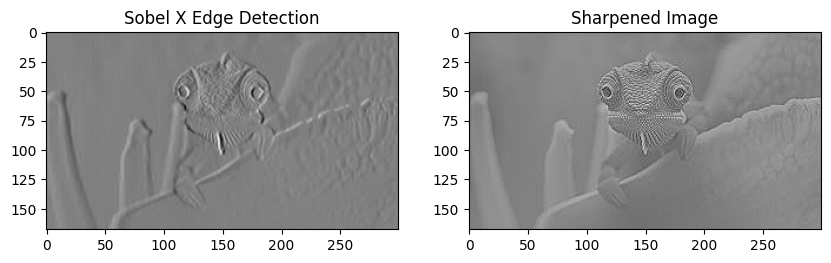

In [20]:
# Sobel Filter (Edge Detection in X direction)
sobel_x = cv2.Sobel(normalized_image, cv2.CV_64F, 1, 0, ksize=3)

# Sharpening Kernel
sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])
sharpened_image = cv2.filter2D(normalized_image, -1, sharpening_kernel)

# Display the results
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X Edge Detection')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')

plt.show()

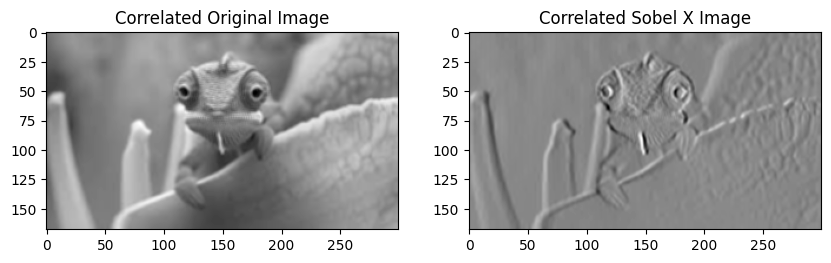

In [21]:
# Define a correlation kernel (mean filter as an example)
mean_kernel = np.ones((3, 3)) / 9.0

# Apply correlation on the grayscale image
correlated_original = cv2.filter2D(normalized_image, -1, mean_kernel)

# Apply correlation on the convolution images
correlated_sobel = cv2.filter2D(sobel_x, -1, mean_kernel)
correlated_sharpen = cv2.filter2D(sharpened_image, -1, mean_kernel)

# Display the results
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(correlated_original, cmap='gray')
plt.title('Correlated Original Image')

plt.subplot(1, 2, 2)
plt.imshow(correlated_sobel, cmap='gray')
plt.title('Correlated Sobel X Image')

plt.show()

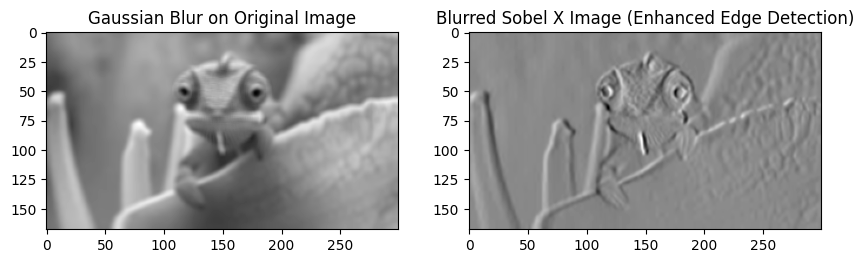

In [22]:
# Apply Gaussian blur to the original image
gaussian_blur = cv2.GaussianBlur(normalized_image, (5, 5), 3)

# Apply Gaussian blur to the Sobel X edge-detected image
blurred_sobel = cv2.GaussianBlur(sobel_x, (5, 5), 0)

# Display the results
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(gaussian_blur, cmap='gray')
plt.title('Gaussian Blur on Original Image')

plt.subplot(1, 2, 2)
plt.imshow(blurred_sobel, cmap='gray')
plt.title('Blurred Sobel X Image (Enhanced Edge Detection)')

plt.show()

# Interpretations

Gaussian blur smoothes the image and lowers noise, which might improve the edges by eliminating minute, unimportant features. It can smooth the edges, making them more continuous and understandable, when applied to the edge-detected image.


---


Correlation can lessen the effect of noise and smooth the image. But it also obscures more subtle information. Correlation reduces the detected edges' intensity and makes them less noticeable when applied to the edge-detected image.


---


Gaussian blur can be applied prior to edge detection in order to reduce noise and improve the clarity and definition of edges. After edge detection, blurring can smooth out jagged edges, but it can also lessen edge sharpness, which means that small details are lost.


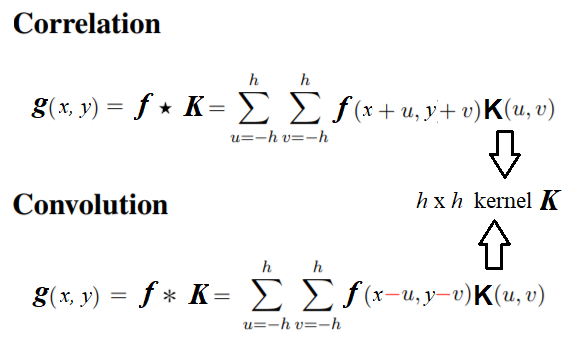